In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ["CUDA_VISIBLE_DEVICES"]='0'

In [2]:
#Read all VMAF outputs into lists
storage_dir = './log/test-reconstruction-vox/prediction/'
no_pred_vmaf = []
for output_num in range(0,44):
    with open(storage_dir + 'vmaf_json_output_no_pred' + f'/vmaf_{output_num:02d}.json','r') as file:
        no_pred_vmaf.append(json.load(file))
rnn_vmaf = []
for output_num in range(0,44):
    with open(storage_dir + 'vmaf_json_output_rnn' + f'/vmaf_{output_num:02d}.json','r') as file:
        rnn_vmaf.append(json.load(file))
vae_vmaf = []
for output_num in range(0,44):
    with open(storage_dir + 'vmaf_json_output_vae' + f'/vmaf_{output_num:02d}.json','r') as file:
        vae_vmaf.append(json.load(file))
vrnn_vmaf = []
for output_num in range(0,44):
    with open(storage_dir + 'vmaf_json_output_vrnn' + f'/vmaf_{output_num:02d}.json','r') as file:
        vrnn_vmaf.append(json.load(file))

In [12]:
#Put all VMAF scores into list variables
no_pred_scores = []
for score in no_pred_vmaf:
    no_pred_scores.append(score['pooled_metrics']['vmaf']['mean'])
rnn_scores = []
for score in rnn_vmaf:
    rnn_scores.append(score['pooled_metrics']['vmaf']['mean'])
vae_scores = []
for score in vae_vmaf:
    vae_scores.append(score['pooled_metrics']['vmaf']['mean'])
vrnn_scores = []
for score in vrnn_vmaf:
    vrnn_scores.append(score['pooled_metrics']['vmaf']['mean'])

Text(0.5, 1.0, 'Mean VMAF Score by Algorithm')

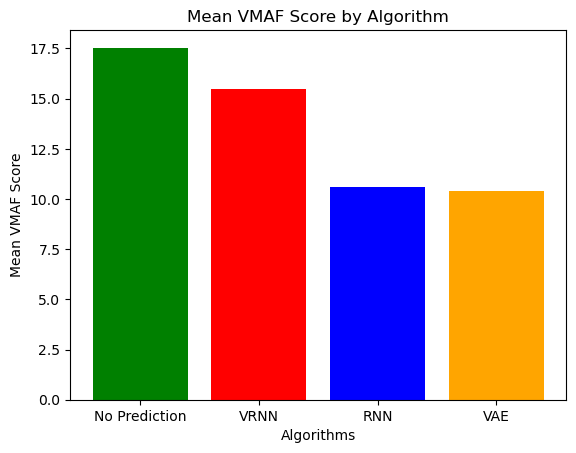

In [13]:
#Set up bar chart - with MEANS
algorithms = ['No Prediction','VRNN','RNN','VAE']
means = [np.mean(no_pred_scores),np.mean(vrnn_scores),np.mean(rnn_scores),np.mean(vae_scores)]

plt.bar(algorithms, means, color=['green','red','blue','orange'])
plt.xlabel('Algorithms')
plt.ylabel('Mean VMAF Score')
plt.title('Mean VMAF Score by Algorithm')

Text(0.5, 1.0, 'Median VMAF Score by Algorithm')

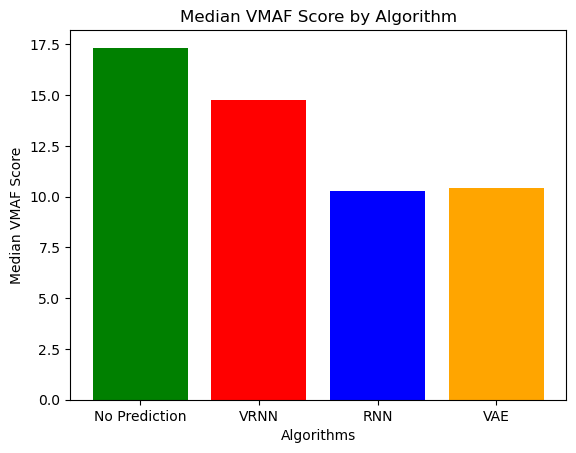

In [14]:
#Set up bar chart - with MEDIANS
medians = [np.median(no_pred_scores),np.median(vrnn_scores),np.median(rnn_scores),np.median(vae_scores)]

plt.bar(algorithms, medians, color=['green','red','blue','orange'])

plt.xlabel('Algorithms')
plt.ylabel('Median VMAF Score')
plt.title('Median VMAF Score by Algorithm')

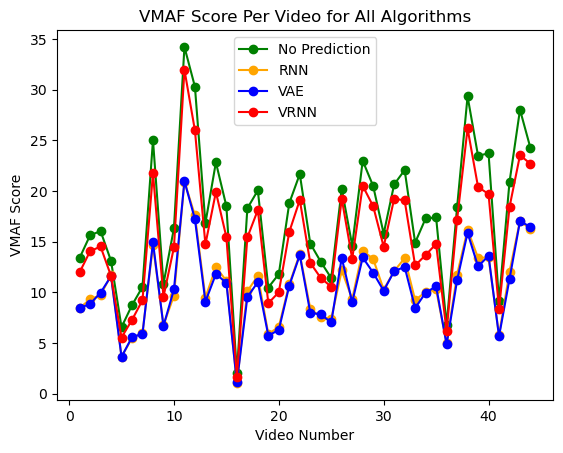

In [15]:
#Line graph of all four algorithms' per-video scores
video_nums = list(range(1,45))

# Add all data series
plt.plot(video_nums, no_pred_scores, label='No Prediction', color='green', marker='o')
plt.plot(video_nums, rnn_scores, label='RNN', color='orange', marker='o')
plt.plot(video_nums, vae_scores, label='VAE', color='blue', marker='o')
plt.plot(video_nums, vrnn_scores, label='VRNN', color='red', marker='o')
#markerfacecolor

# Add labels and title
plt.xlabel('Video Number')
plt.ylabel('VMAF Score')
plt.title('VMAF Score Per Video for All Algorithms')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Text(0.5, 1.0, 'VMAF Performance by Prediction Algorithm')

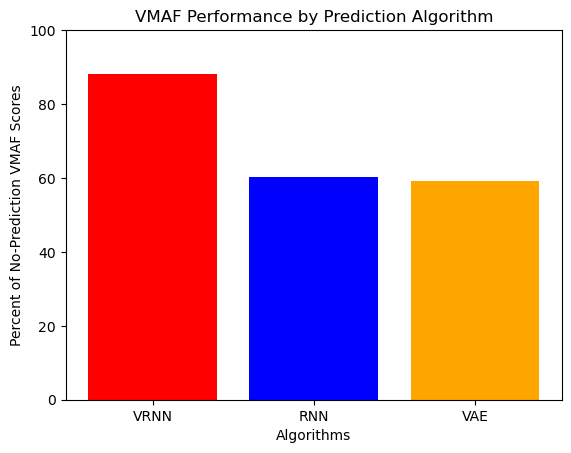

In [32]:
#Bar Chart with Percent of Maximum
algorithms = ['VRNN','RNN','VAE']
max_mean = np.mean(no_pred_scores)
input = [(np.mean(vrnn_scores)/max_mean)*100,(np.mean(rnn_scores)/max_mean)*100,(np.mean(vae_scores)/max_mean)*100]

plt.bar(algorithms, height=input, color=['red','blue','orange'])
plt.ylim(0,100)
plt.xlabel('Algorithms')
plt.ylabel('Percent of No-Prediction VMAF Scores')
plt.title('VMAF Performance by Prediction Algorithm')

In [1]:
#Histogram with No Prediction - Normalized
example_vid = no_pred_vmaf[10]
example_frames = []
for i in range (0,120):
    example_frames.append(example_vid['frames'][i]['metrics']['vmaf'])
frame_max = np.max(example_frames)
frames_norm = (example_frames/frame_max)*100

# Create the histogram
plt.hist(frames_norm, bins=15, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('VMAF Scores (% of Maximum)')
plt.ylabel('Frequency')
plt.title('Frame-by-Frame VMAF Score Distribution with No Prediction')


NameError: name 'no_pred_vmaf' is not defined

Text(0.5, 1.0, 'Frame-by-Frame VMAF Score Distribution with VRNN')

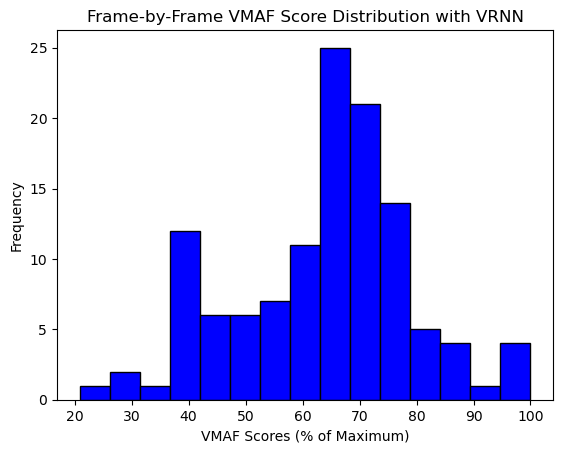

In [78]:
#Histogram with VRNN - Normalized
example_vid = vrnn_vmaf[10]
example_frames = []
for i in range (0,120):
    example_frames.append(example_vid['frames'][i]['metrics']['vmaf'])
frame_max = np.max(example_frames)
frames_norm = (example_frames/frame_max)*100

# Create the histogram
plt.hist(frames_norm, bins=15, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('VMAF Scores (% of Maximum)')
plt.ylabel('Frequency')
plt.title('Frame-by-Frame VMAF Score Distribution with VRNN')


Text(0.5, 1.0, 'Frame-by-Frame VMAF Score Distribution with RNN')

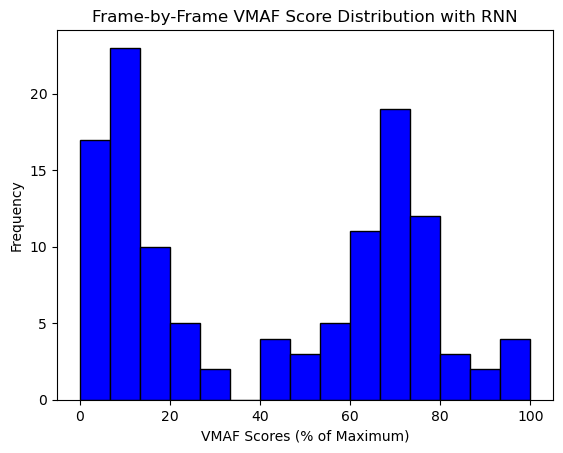

In [79]:
#Histogram with RNN - Normalized
example_vid = rnn_vmaf[10]
example_frames = []
for i in range (0,120):
    example_frames.append(example_vid['frames'][i]['metrics']['vmaf'])
frame_max = np.max(example_frames)
frames_norm = (example_frames/frame_max)*100

# Create the histogram
plt.hist(frames_norm, bins=15, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('VMAF Scores (% of Maximum)')
plt.ylabel('Frequency')
plt.title('Frame-by-Frame VMAF Score Distribution with RNN')


Text(0.5, 1.0, 'Frame-by-Frame VMAF Score Distribution with VAE')

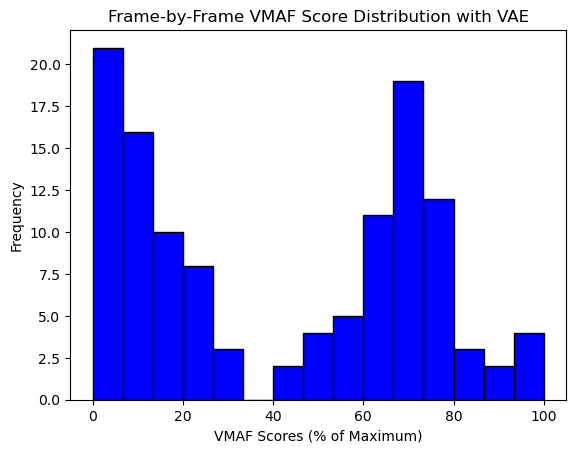

In [80]:
#Histogram with RNN - Normalized
example_vid = vae_vmaf[10]
example_frames = []
for i in range (0,120):
    example_frames.append(example_vid['frames'][i]['metrics']['vmaf'])
frame_max = np.max(example_frames)
frames_norm = (example_frames/frame_max)*100

# Create the histogram
plt.hist(frames_norm, bins=15, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('VMAF Scores (% of Maximum)')
plt.ylabel('Frequency')
plt.title('Frame-by-Frame VMAF Score Distribution with VAE')
